In [ ]:
{{ badge }}

# Yahoo finance for currencies

## This is a notebook that performs some descriptive analysis on diverse currencies

### Let's check how MXN, USD & NZD have moved in the last 6 months

We'll be using hourly data obtained from Yahoo finance using the package yfinance. 

Let's import the descriptive statistics we've created in lib.py and a few methods from our download_currencies module:

In [1]:
from lib import read_data, print_range, plot_returns
from download_currencies import download_prices_long, create_tickers
import polars as pl

We'll start by creating a list, currencies, that contains the fx pairs we'll be analyzing. We can then use create_tickers to create a list, tickers, that will be used in yfinance's download method.

Finally, we download a csv with the Open, High, Low, Close prices for each hour in the last 6 months.

In [2]:
currencies = ['usdmxn', 'eurusd', 'nzdusd']
tickers = create_tickers(currencies)
download_prices_long(tickers)

[*********************100%%**********************]  3 of 3 completed


Now let's import our data and see what we're dealing with:

In [3]:
prices = read_data('currency_prices_long.csv')
prices.head()

,Datetime,Price type,Instrument,Price
i64,datetime[μs],str,str,f64
0,2023-03-20 00:00:00,"""Adj Close""","""EURUSD=X""",1.068376
1,2023-03-20 01:00:00,"""Adj Close""","""EURUSD=X""",1.067806
2,2023-03-20 02:00:00,"""Adj Close""","""EURUSD=X""",1.068262
3,2023-03-20 03:00:00,"""Adj Close""","""EURUSD=X""",1.067236
4,2023-03-20 04:00:00,"""Adj Close""","""EURUSD=X""",1.06735


What does the Price type column contain?

In [4]:
prices['Price type'].unique()

Price type
str
"""Open"""
"""Adj Close"""
"""Close"""
"""Volume"""
"""Low"""
"""High"""


As we can see, the dataframe contains a Price type column with Open, High, Low, etc. 
That means that these columns describe the different prices observed by that currency given a certain hour.

Let's look at a quick example of each currency's average price by Price type for the last 6 months:

In [5]:
prices.group_by(['Instrument','Price type']).mean().filter(pl.col('Price type') != 'Volume')[['Instrument','Price type','Price']].sort(by='Instrument')

Instrument,Price type,Price
str,str,f64
"""EURUSD=X""","""High""",1.090853
"""EURUSD=X""","""Low""",1.08964
"""EURUSD=X""","""Open""",1.090216
"""EURUSD=X""","""Adj Close""",1.090219
"""EURUSD=X""","""Close""",1.090219
"""NZDUSD=X""","""High""",0.614438
"""NZDUSD=X""","""Low""",0.613446
"""NZDUSD=X""","""Open""",0.61394
"""NZDUSD=X""","""Adj Close""",0.613928


Let's run a few more descriptive statistics:

In [6]:
print_range(prices)

Let's analyze the following currencies ['NZDUSD', 'USDMXN', 'EURUSD']:

NZDUSD's current value is 0.59.
Between 20/Mar/23 and 18/Sep/23:
- NZDUSD dropped -5.74%
- NZDUSD reached a low of 0.59 on 05 Sep 23
- NZDUSD reached a high of 0.64 on 14 Jul 23
- NZDUSD had an average and standard deviation of 0.61 and 0.01 over the period.
shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 3116.0   │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.613928 │
│ std        ┆ 0.012964 │
│ min        ┆ 0.58651  │
│ 25%        ┆ 0.60584  │
│ 50%        ┆ 0.617246 │
│ 75%        ┆ 0.623092 │
│ max        ┆ 0.641149 │
└────────────┴──────────┘
USDMXN's current value is 17.12.
Between 20/Mar/23 and 18/Sep/23:
- USDMXN dropped -9.18%
- USDMXN reached a low of 16.62 on 28 Jul 23
- USDMXN reached a high of 19.23 on 20 Mar 23
- USDMXN had an average and standard deviation of 17.45 and 0.52 over the period.
sh

Last, but not least, let's take a look at each currency's return over the last 6 months. Which one do you think has had the best performance?

c:\Users\cerva\My Drive (cervantes257@gmail.com)\Maestria\Duke\Clases\IDS 706 Data Engineering\JCB_project1\src\lib.py:40: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=5)


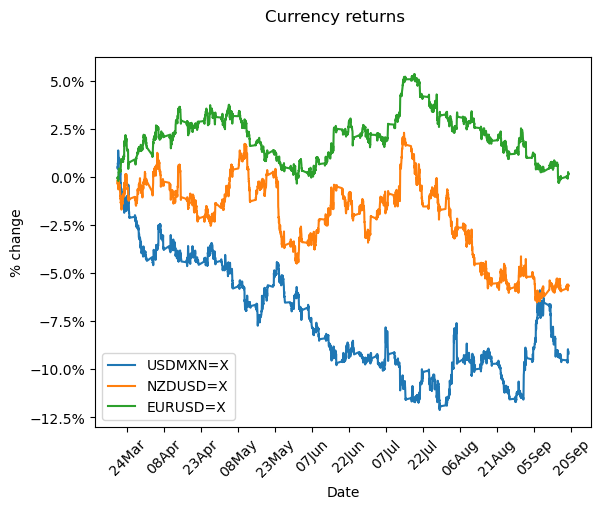

In [7]:
plot_returns(prices, 'Close')

Interesting! Over the last 6 months, the Mexican peso has enjoyed the best performance. Over the period, MXN has appreciated around 9.5% against USD while the EUR has remained relatively flat and NZD has lost -5.7% vs USD.